Nama: Muhammad Yusuf Alpian

---

Email: llawliet1945@gmail.com

---

No Telp: +6281314699149

---

In [139]:
import tensorflow as tensor
import keras_preprocessing
from keras_preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from sklearn.model_selection import train_test_split

print(tensor.__version__)

2.3.0


In [140]:
!wget \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-28 09:42:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  3.47MB/s    in 59s     

2020-10-28 09:43:38 (5.20 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [141]:
# extracting zip file

import os,zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

base_dir = '/tmp/dataset/rockpaperscissors/rps-cv-images'

In [142]:
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))
os.listdir('/tmp/dataset/rockpaperscissors/rps-cv-images')

['scissors', 'rock', 'paper']

In [143]:
rock_dir = os.path.join('/tmp/data_set/rockpaperscissors/rps-cv-images/rock')
paper_dir = os.path.join('/tmp/data_set/rockpaperscissors/rps-cv-images/paper')
scissors_dir = os.path.join('/tmp/data_set/rockpaperscissors/rps-cv-images/scissors')

print('Train rock img     :', len(os.listdir(rock_dir)))
print('Train paper img    :', len(os.listdir(paper_dir)))
print('Train scissors img :', len(os.listdir(scissors_dir)))

rock = os.listdir(rock_dir)
print('Rock files     :',rock[:5])

paper = os.listdir(paper_dir)
print('Paper files    :',paper[:5])

scissors = os.listdir(scissors_dir)
print('Scissors files :',scissors[:5])

Train rock img     : 726
Train paper img    : 712
Train scissors img : 750
Rock files     : ['rHHsm5b1CvmcWT57.png', '9a9TiJDB5oAWqO9U.png', 'XdWXMPZZwwXhwYGI.png', 'oIoIl8ZLod1q9i1s.png', '5dxMkdp9L1r6Dv8X.png']
Paper files    : ['ejC8QIku5jrtci48.png', 'P0BIztnCzZ3StLD1.png', 'lZkRVz5sifz7CD66.png', 'eASnEW16rlMUPMf3.png', 'Dvamqz9JlSMySW1i.png']
Scissors files : ['ainbAijlBiMxQcNq.png', '5QHP8zydBsbWyt4T.png', 'gQyIUVHeIS3WYuzv.png', '3UH9T0W1eZQW36xF.png', 'A0t6YRrNR7SEI6DZ.png']


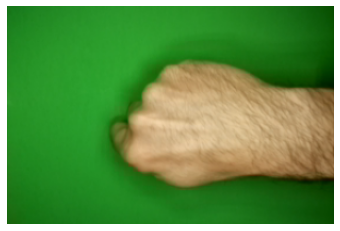

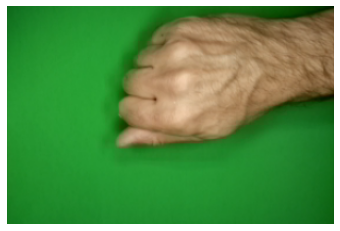

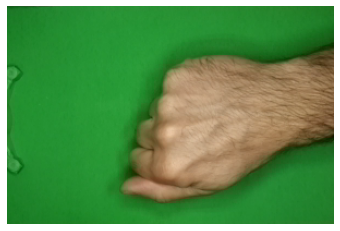

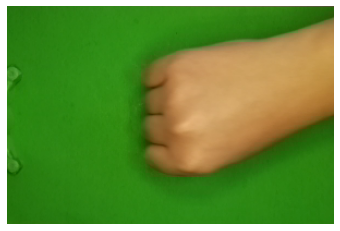

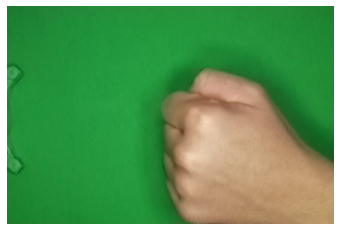

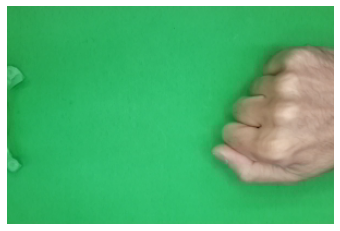

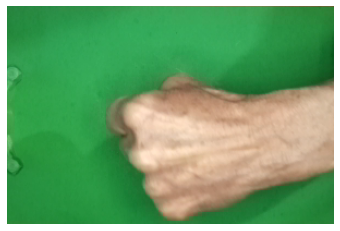

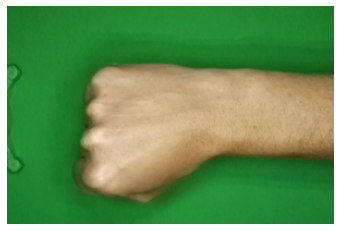

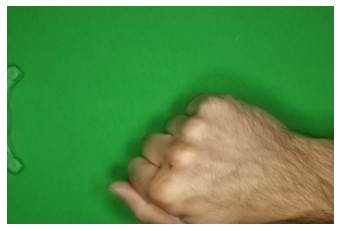

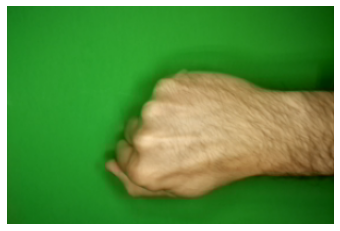

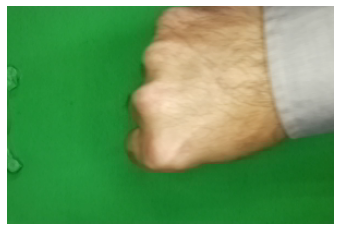

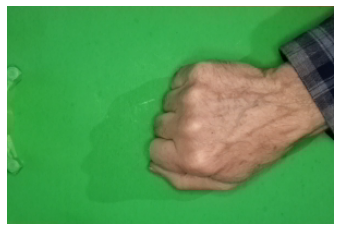

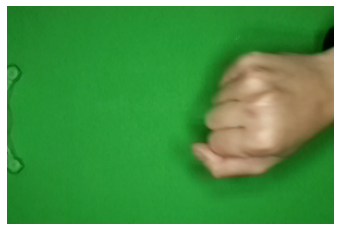

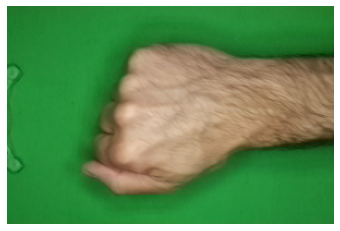

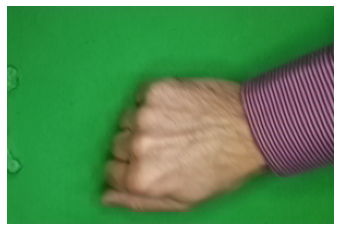

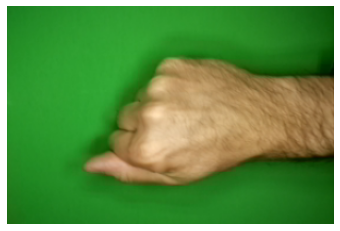

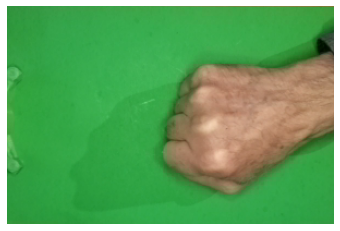

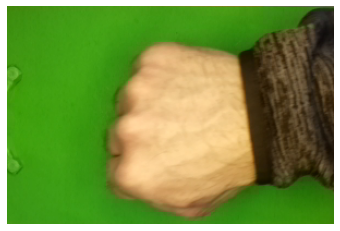

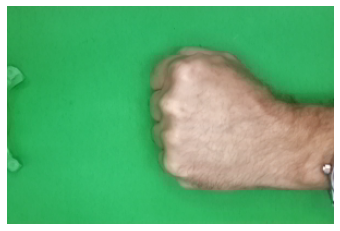

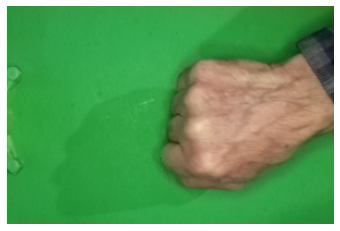

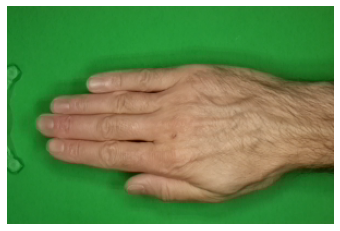

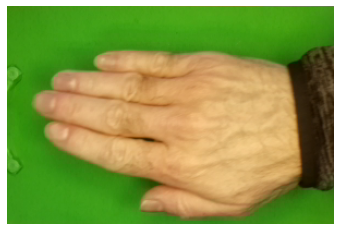

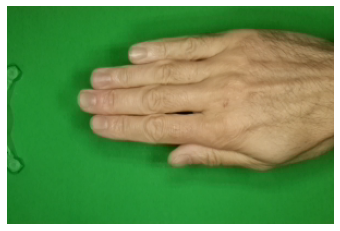

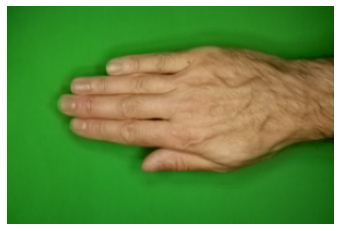

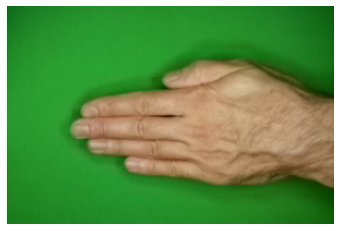

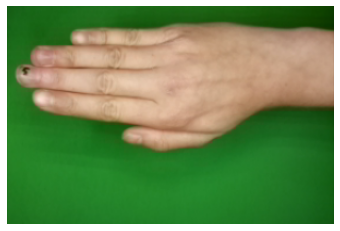

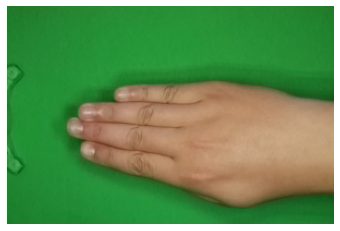

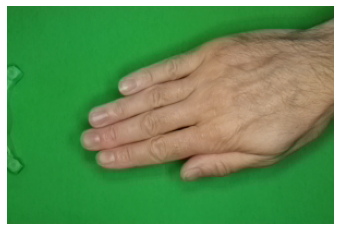

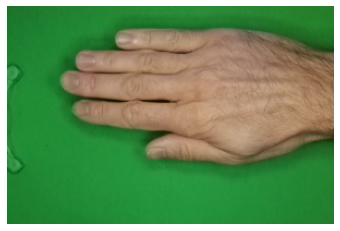

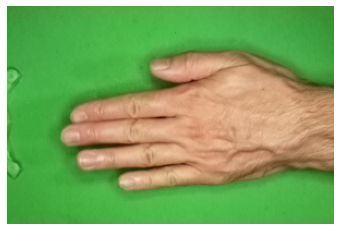

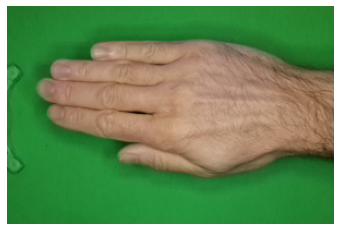

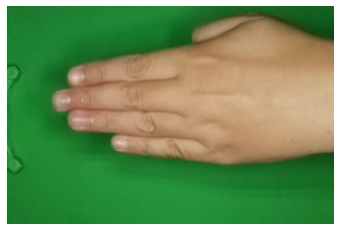

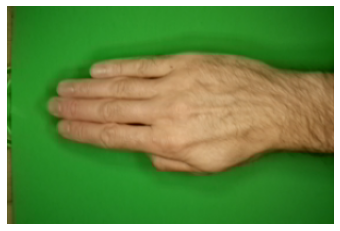

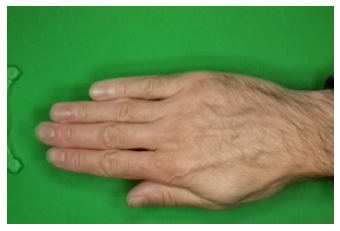

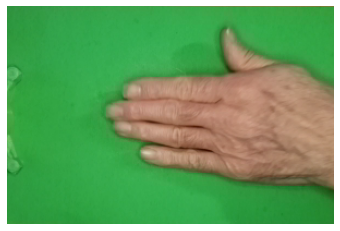

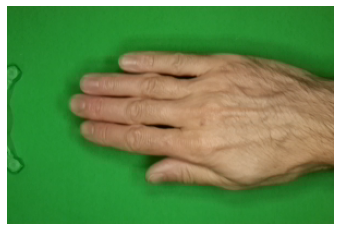

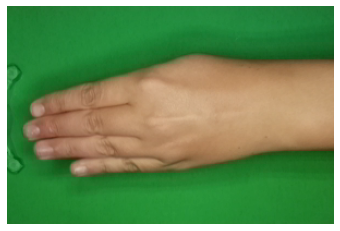

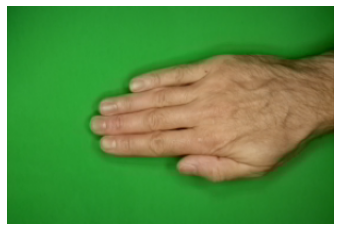

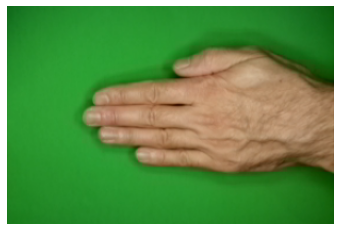

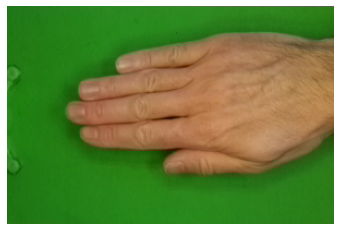

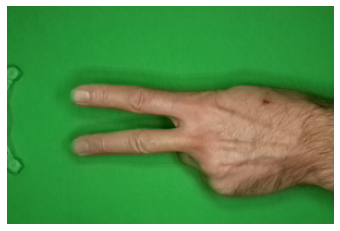

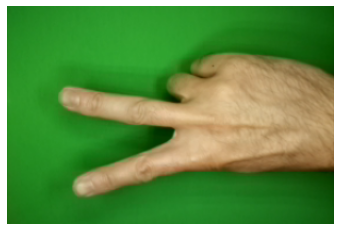

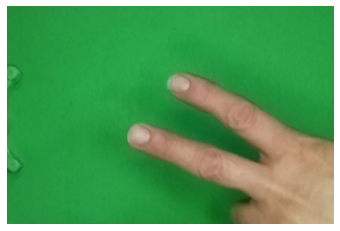

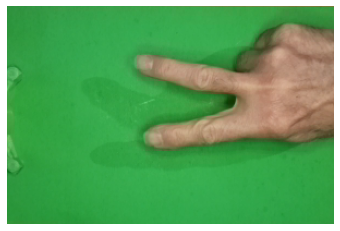

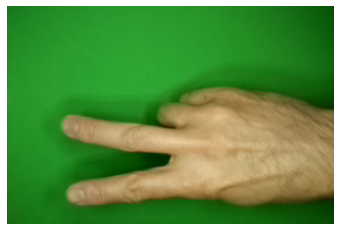

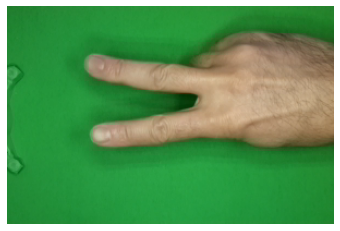

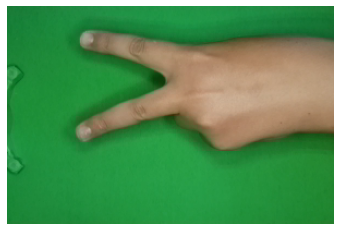

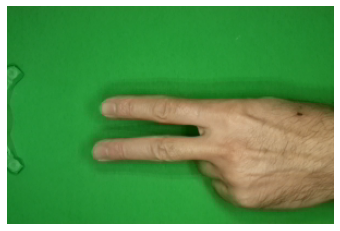

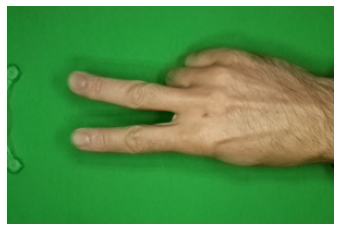

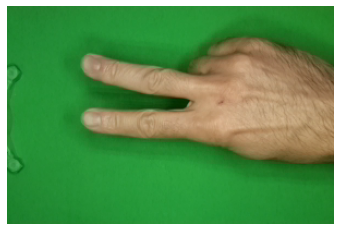

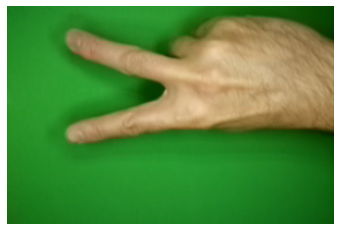

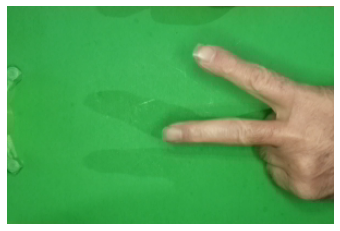

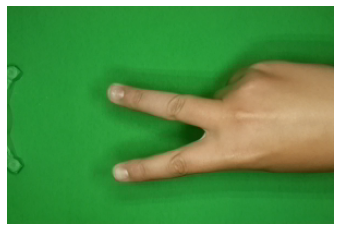

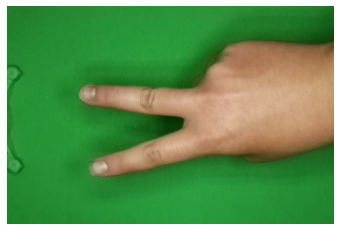

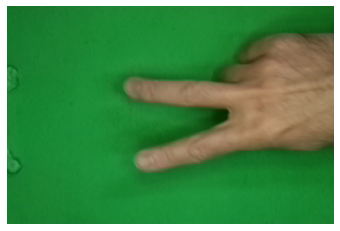

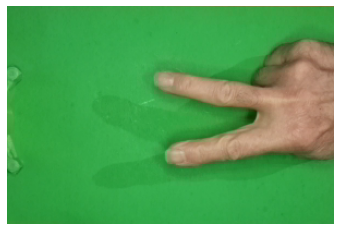

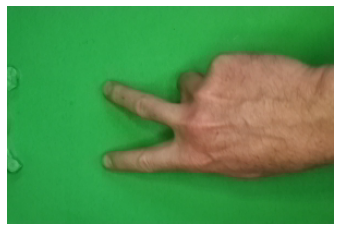

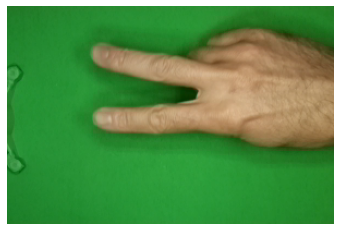

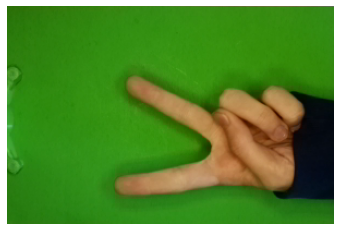

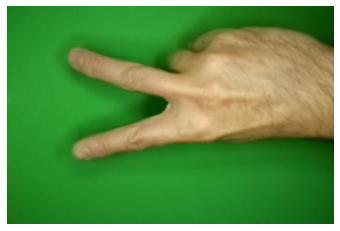

In [145]:
%matplotlib inline

import matplotlib.pyplot as pyp
import matplotlib.image as mimg

index = 20

Rock = [os.path.join(rock_dir, files)
    for files in rock[index-20:index]]

Paper = [os.path.join(paper_dir, files)
    for files in paper[index-20:index]]

Scissors = [os.path.join(scissors_dir, files)
    for files in scissors[index-20:index]]

for i, img_path in enumerate(Rock+Paper+Scissors):
    img = mimg.imread(img_path)
    pyp.imshow(img)
    pyp.axis('Off')
    pyp.show()

In [144]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range=0.2, 
    zoom_range=0.2, 
    shear_range = 0.2,
    horizontal_flip=True,
    fill_mode = 'nearest',
    validation_split = 0.4)

validation_data = ImageDataGenerator(
    rescale = 1./255,
    validation_split=0.4)

train_generator = train_data.flow_from_directory(
    base_dir,  # direktori data train
    target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=10,
    class_mode='categorical',
    subset='training') # masalah klasifikasi 3 kelas, menggunakan class_mode = 'categorical'
 
validation_generator = validation_data.flow_from_directory(
    base_dir, # direktori data validasi
    target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=10,
    class_mode='categorical',
    subset='validation') # masalah klasifikasi 3 kelas, menggunakan class_mode = 'categorical'

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [146]:
model = tensor.keras.models.Sequential([
    tensor.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tensor.keras.layers.MaxPooling2D(2, 2),
    tensor.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tensor.keras.layers.MaxPooling2D(2,2),
    tensor.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tensor.keras.layers.MaxPooling2D(2,2),
    tensor.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tensor.keras.layers.MaxPooling2D(2,2),
    tensor.keras.layers.Flatten(),
    tensor.keras.layers.Dropout(0.5),
    tensor.keras.layers.Dense(512, activation='relu'),
    tensor.keras.layers.Dense(3, activation='softmax')
])

In [147]:
model.summary()

model.compile(
    loss = 'categorical_crossentropy', 
    optimizer='rmsprop', 
    metrics=['accuracy'])

history = model.fit(
    train_generator, 
    epochs=30, 
    steps_per_epoch=20, 
    validation_data = validation_generator, 
    callbacks = [callbacks],
    verbose = 1, 
    validation_steps=5)

model.save("model.h5")

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 15, 15, 128)     

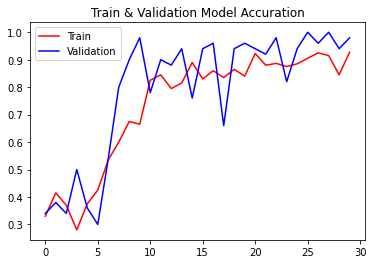

<Figure size 432x288 with 0 Axes>

In [148]:
import matplotlib.pyplot as pyp

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

pyp.plot(epochs, accuracy, 'r', label='Train')
pyp.plot(epochs, val_accuracy, 'b', label='Validation')
pyp.title('Train & Validation Model Accuration')
pyp.legend(loc=0)
pyp.figure()
pyp.show()

In [152]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  img = np.vstack([x])
  Class = model.predict(img, batch_size=10)
  print(fn)
  print(Class)

  if Class[0][0]==1:
    print('This is a Paper')
  elif Class[0][1]==1:
    print('This is a Rock')
  else:
    print('This is a Scissors')

Saving 2tRxoWcFfrvjsHTZ.png to 2tRxoWcFfrvjsHTZ.png
2tRxoWcFfrvjsHTZ.png
[[0. 0. 1.]]
This is a Scissors
